# Tarea 2

In [463]:
# Import necessary libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

# For visualization
import seaborn as sns


## Load and Preprocess Images:

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


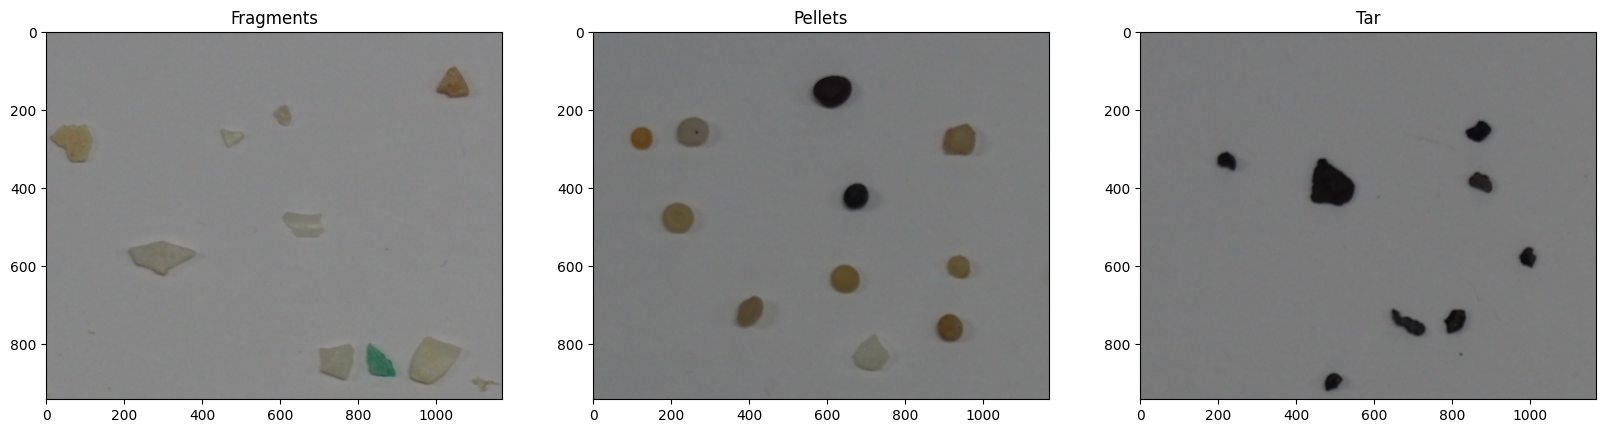

In [464]:
# Load the images 
# img_fragments = cv2.imread('fragment-03-olympus-10-01-2020.JPG')
# img_pellets = cv2.imread('pellet-03-olympus-10-01-2020.JPG')
# img_tar = cv2.imread('tar-03-olympus-10-01-2020.JPG')

img_fragments = cv2.imread('FRA.png')
img_pellets = cv2.imread('PEL.png')
img_tar = cv2.imread('TAR.png')

# Display the images
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(cv2.cvtColor(img_fragments, cv2.COLOR_BGR2RGB))
plt.title('Fragments')
plt.subplot(132)
plt.imshow(cv2.cvtColor(img_pellets, cv2.COLOR_BGR2RGB))
plt.title('Pellets')
plt.subplot(133)
plt.imshow(cv2.cvtColor(img_tar, cv2.COLOR_BGR2RGB))
plt.title('Tar')
plt.show()

# Convert images to grayscale
gray_fragments = cv2.cvtColor(img_fragments, cv2.COLOR_BGR2GRAY)
gray_pellets = cv2.cvtColor(img_pellets, cv2.COLOR_BGR2GRAY)
gray_tar = cv2.cvtColor(img_tar, cv2.COLOR_BGR2GRAY)


In [465]:
# Gaussian Blur to reduce noise and improve thresholding
blur_fragments = cv2.GaussianBlur(gray_fragments, (3, 3), sigmaX=1.0)
blur_pellets = cv2.GaussianBlur(gray_pellets, (3, 3), sigmaX=1.0)
blur_tar = cv2.GaussianBlur(gray_tar, (3, 3), sigmaX=1.0)

### Morphological Opening:

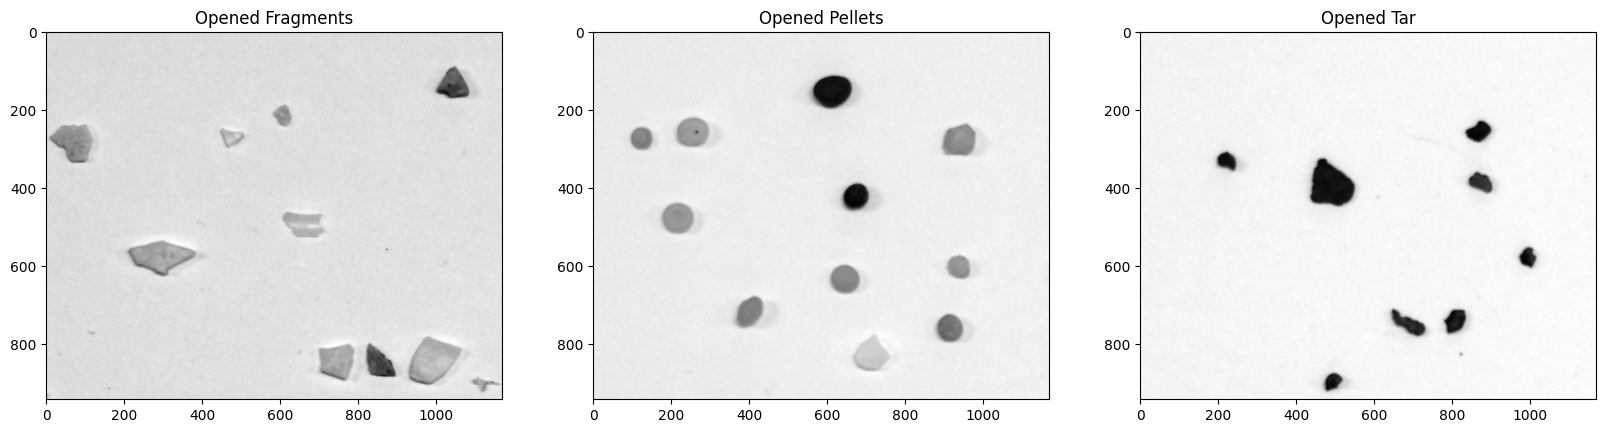

In [466]:
# Define a kernel for morphological operations
kernel = np.ones((3, 3), np.uint8)

# Apply opening to remove small objects and noise
opening_fragments = cv2.morphologyEx(blur_fragments, cv2.MORPH_OPEN, kernel, iterations=2)
opening_pellets = cv2.morphologyEx(blur_pellets, cv2.MORPH_OPEN, kernel, iterations=2)
opening_tar = cv2.morphologyEx(blur_tar, cv2.MORPH_OPEN, kernel, iterations=2)

# Print the opened images
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(opening_fragments, cmap='gray')
plt.title('Opened Fragments')
plt.subplot(132)
plt.imshow(opening_pellets, cmap='gray')
plt.title('Opened Pellets')
plt.subplot(133)
plt.imshow(opening_tar, cmap='gray')
plt.title('Opened Tar')
plt.show()

### Thresholding and Inversion:

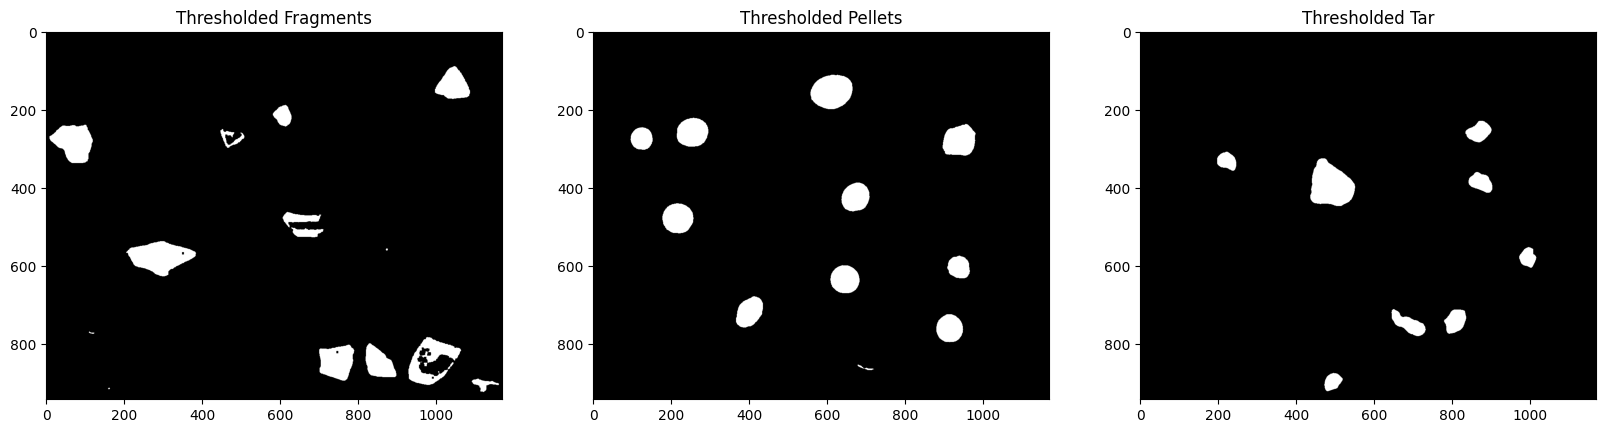

In [467]:
# Apply Otsu's thresholding
_, thresh_fragments = cv2.threshold(opening_fragments, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_pellets = cv2.threshold(opening_pellets, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, thresh_tar = cv2.threshold(opening_tar, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invert images (particles should be white)
thresh_fragments = cv2.bitwise_not(thresh_fragments)
thresh_pellets = cv2.bitwise_not(thresh_pellets)
thresh_tar = cv2.bitwise_not(thresh_tar)

# Print the thresholded and inverted images
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(thresh_fragments, cmap='gray')
plt.title('Thresholded Fragments')
plt.subplot(132)
plt.imshow(thresh_pellets, cmap='gray')
plt.title('Thresholded Pellets')
plt.subplot(133)
plt.imshow(thresh_tar, cmap='gray')
plt.title('Thresholded Tar')
plt.show()

### Contour Detection:

In [468]:
# Find contours for each image
contours_fragments, _ = cv2.findContours(thresh_fragments, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_pellets, _ = cv2.findContours(thresh_pellets, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_tar, _ = cv2.findContours(thresh_tar, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Number of fragments contours before filtering: 16
Number of fragments contours after filtering: 11
Number of pellets contours before filtering: 11
Number of pellets contours after filtering: 10
Number of tar contours before filtering: 8
Number of tar contours after filtering: 8
Max area for fragments: 9435.0
Max area for pellets: 7261.5
Max area for tar: 9728.0


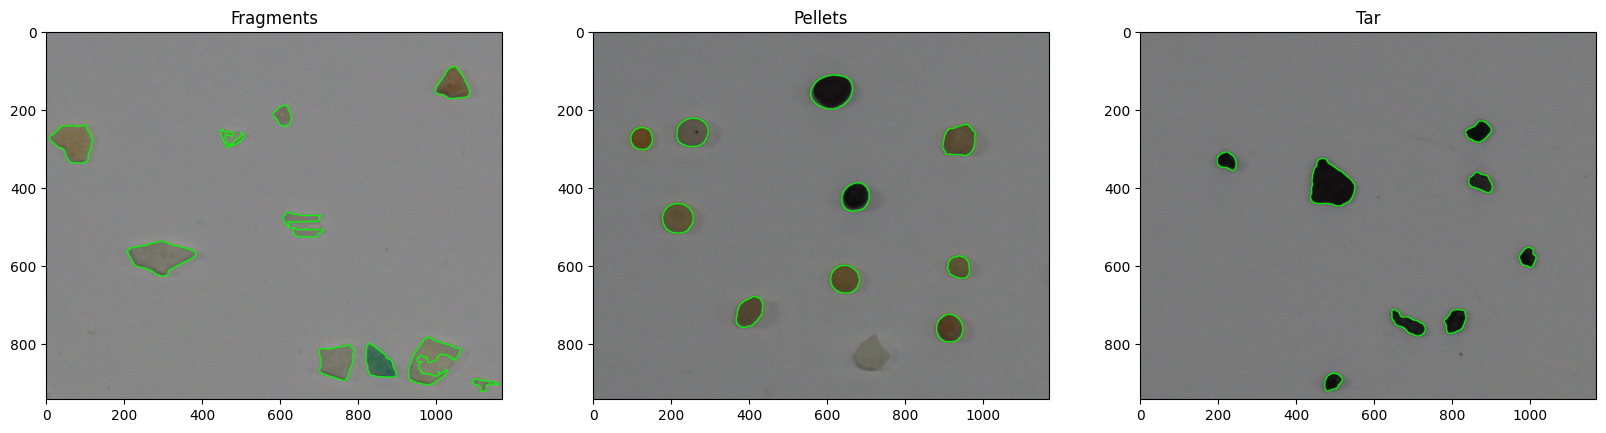

In [469]:
# Set a minimum area threshold to filter out noise
min_area = 600
max_area = 20000

# Filter contours based on area
filtered_fragments = [cnt for cnt in contours_fragments if cv2.contourArea(cnt) > min_area and cv2.contourArea(cnt) < max_area]
filtered_pellets = [cnt for cnt in contours_pellets if cv2.contourArea(cnt) > min_area and cv2.contourArea(cnt) < max_area]
filtered_tar = [cnt for cnt in contours_tar if cv2.contourArea(cnt) > min_area and cv2.contourArea(cnt) < max_area]

# Print the number of contours before and after filtering
print('Number of fragments contours before filtering:', len(contours_fragments))
print('Number of fragments contours after filtering:', len(filtered_fragments))
print('Number of pellets contours before filtering:', len(contours_pellets))
print('Number of pellets contours after filtering:', len(filtered_pellets))
print('Number of tar contours before filtering:', len(contours_tar))
print('Number of tar contours after filtering:', len(filtered_tar))

# Create a copy of the original images
fragments_copy = img_fragments.copy()
pellets_copy = img_pellets.copy()
tar_copy = img_tar.copy()

# Draw the filtered contours on the copies
cv2.drawContours(fragments_copy, filtered_fragments, -1, (0, 255, 0), 2)
cv2.drawContours(pellets_copy, filtered_pellets, -1, (0, 255, 0), 2)
cv2.drawContours(tar_copy, filtered_tar, -1, (0, 255, 0), 2)

# Print max area for each image
print('Max area for fragments:', max([cv2.contourArea(cnt) for cnt in filtered_fragments]))
print('Max area for pellets:', max([cv2.contourArea(cnt) for cnt in filtered_pellets]))
print('Max area for tar:', max([cv2.contourArea(cnt) for cnt in filtered_tar]))

# Print the images with the contours
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(cv2.cvtColor(fragments_copy, cv2.COLOR_BGR2RGB))
plt.title('Fragments')
plt.subplot(132)
plt.imshow(cv2.cvtColor(pellets_copy, cv2.COLOR_BGR2RGB))
plt.title('Pellets')
plt.subplot(133)
plt.imshow(cv2.cvtColor(tar_copy, cv2.COLOR_BGR2RGB))
plt.title('Tar')
plt.show()

## Feature Extraction

In [470]:
def extract_features(contour):
    features = {}
    # Area
    area = cv2.contourArea(contour)
    features['area'] = area

    # Perimeter
    perimeter = cv2.arcLength(contour, True)
    features['perimeter'] = perimeter

    # Compactness
    if area != 0:
        compactness = (perimeter ** 2) / area
    else:
        compactness = 0
    features['compactness'] = compactness

    # Bounding rectangle
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = float(w) / h if h != 0 else 0
    features['aspect_ratio'] = aspect_ratio

    # Extent (area ratio)
    rect_area = w * h
    extent = area / rect_area if rect_area != 0 else 0
    features['extent'] = extent

    # Ellipse axes ratio
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        (center, axes, orientation) = ellipse
        major_axis = max(axes)
        minor_axis = min(axes)
        ellipse_axis_ratio = minor_axis / major_axis if major_axis != 0 else 0
        features['ellipse_axis_ratio'] = ellipse_axis_ratio
    else:
        features['ellipse_axis_ratio'] = 0

    return features

In [471]:
# Initialize a list to store data
data = []

# Process fragments
for contour in filtered_fragments:
    features = extract_features(contour)
    features['label'] = 'Fragment'
    data.append(features)

# Process pellets
for contour in filtered_pellets:
    features = extract_features(contour)
    features['label'] = 'Pellet'
    data.append(features)

# Process tar
for contour in filtered_tar:
    features = extract_features(contour)
    features['label'] = 'Tar'
    data.append(features)

# Create a DataFrame
df = pd.DataFrame(data)

In [472]:
from scipy import stats

# Calculate the Z-scores for each feature
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers
threshold = 3

# Filter out rows that have Z-scores above the threshold
df_clean = df[(z_scores < threshold).all(axis=1)]
df_clean = df

              area   perimeter  compactness  aspect_ratio     extent  \
count    29.000000   29.000000    29.000000     29.000000  29.000000   
mean   3881.310345  264.430345    23.005760      1.233037   0.646458   
std    2475.523243  109.389581    18.611983      0.551007   0.131230   
min     856.500000  150.610172    14.148697      0.830189   0.287802   
25%    1736.500000  191.379723    14.815215      0.978261   0.631283   
50%    3774.000000  244.793936    16.015532      1.041667   0.673837   
75%    4772.500000  284.835567    18.009419      1.218182   0.753781   
max    9728.000000  688.156415    99.554197      3.320000   0.782282   

       ellipse_axis_ratio  
count           29.000000  
mean             0.737133  
std              0.202812  
min              0.243412  
25%              0.677404  
50%              0.783328  
75%              0.893818  
max              0.974216  


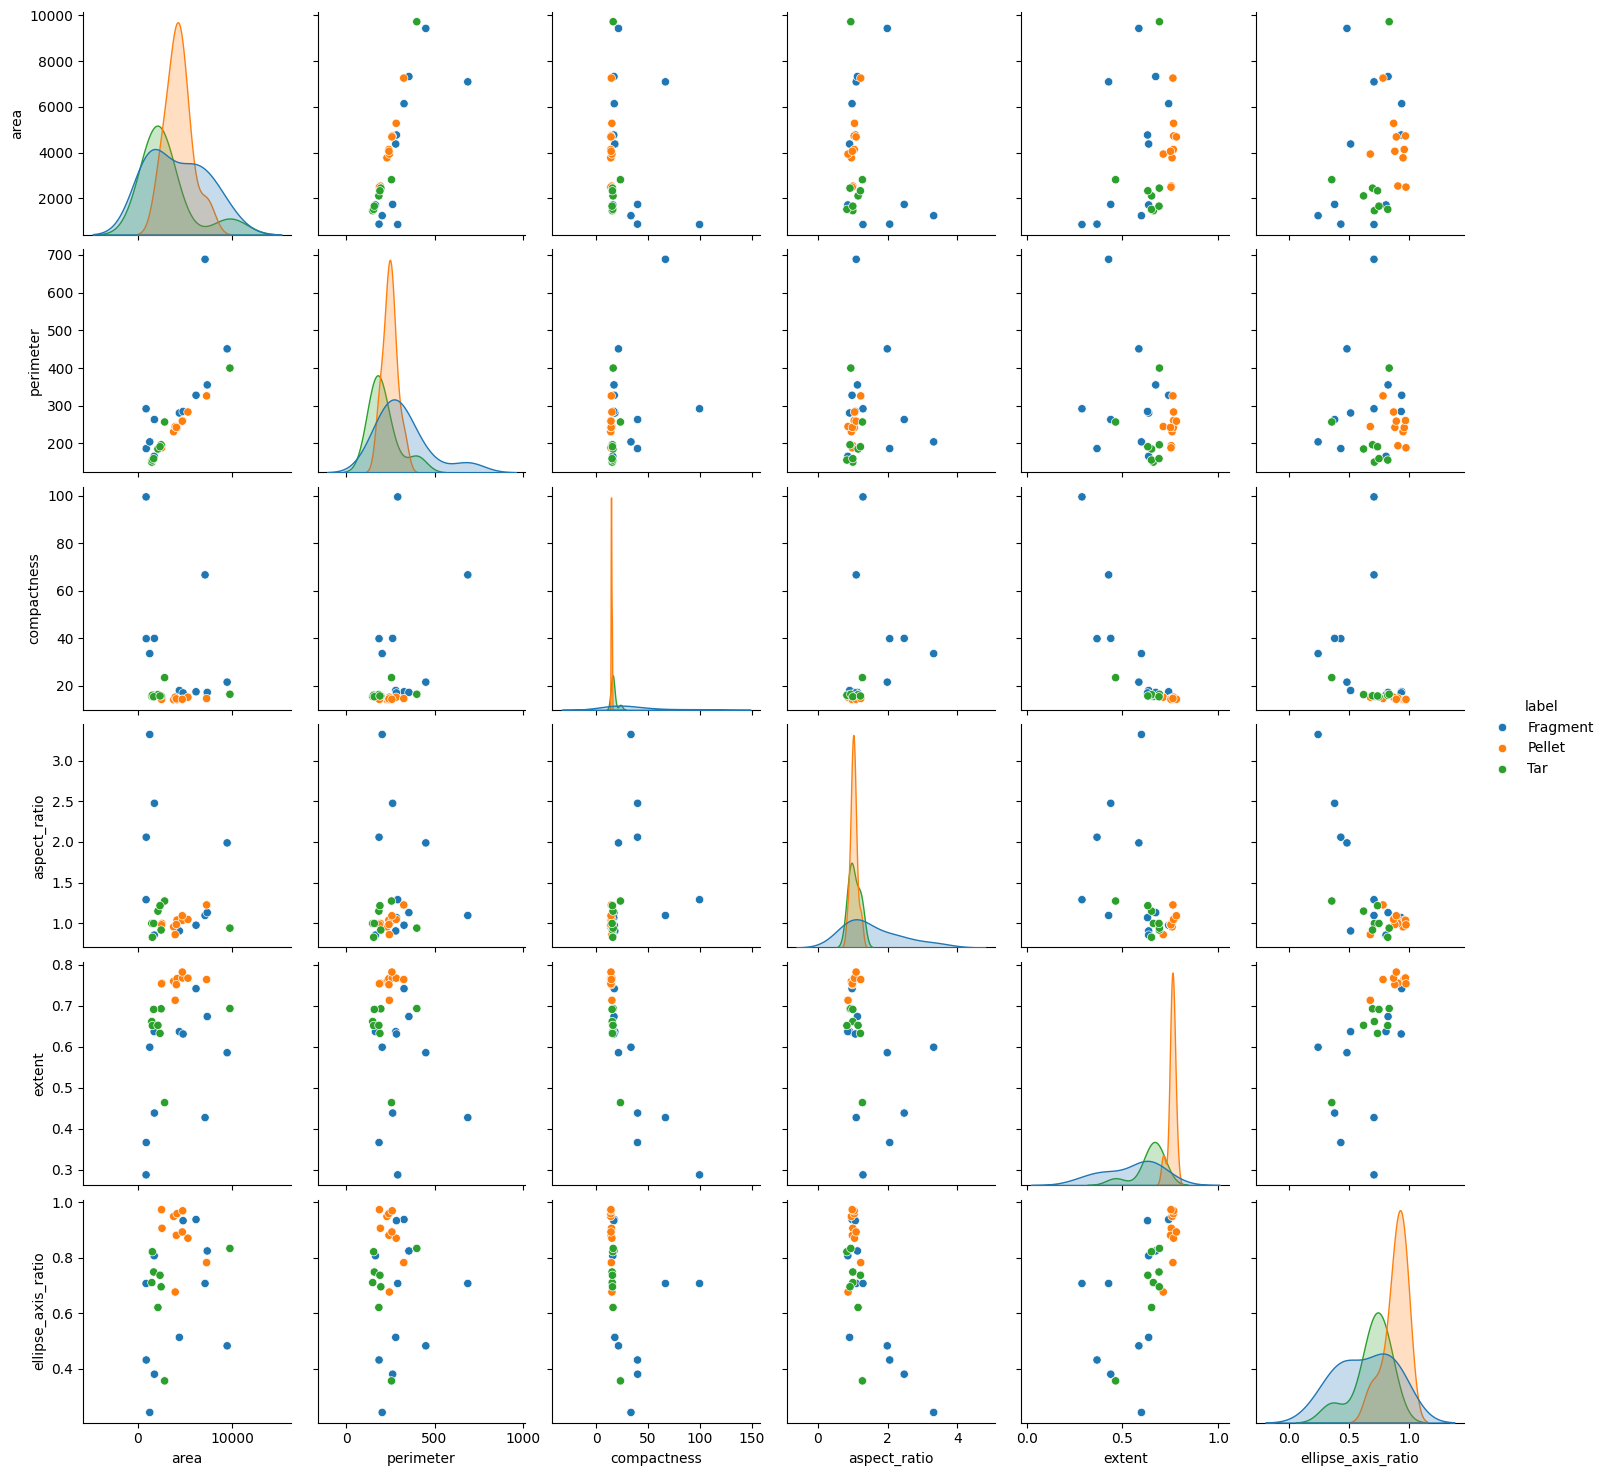

In [473]:
# Display first few rows
# print(df_clean.head())

# Statistical summary
print(df_clean.describe())

# Visualize feature distribution
sns.pairplot(df_clean, hue='label')
plt.show()

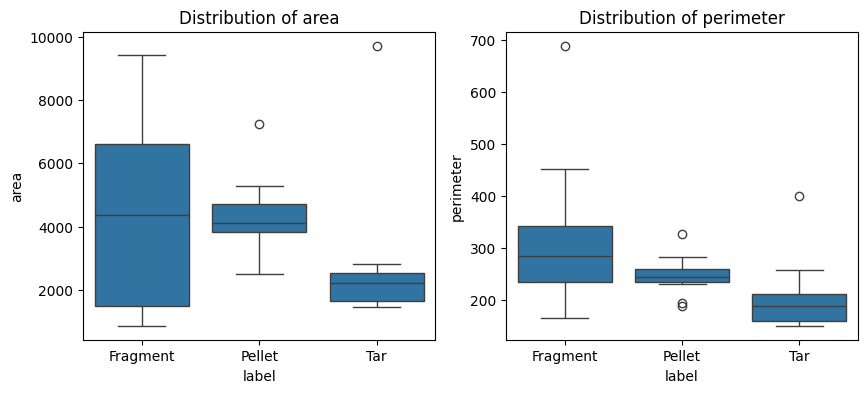

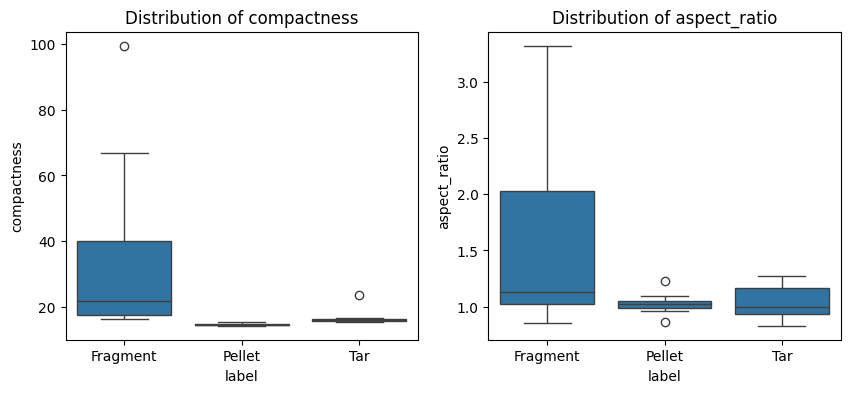

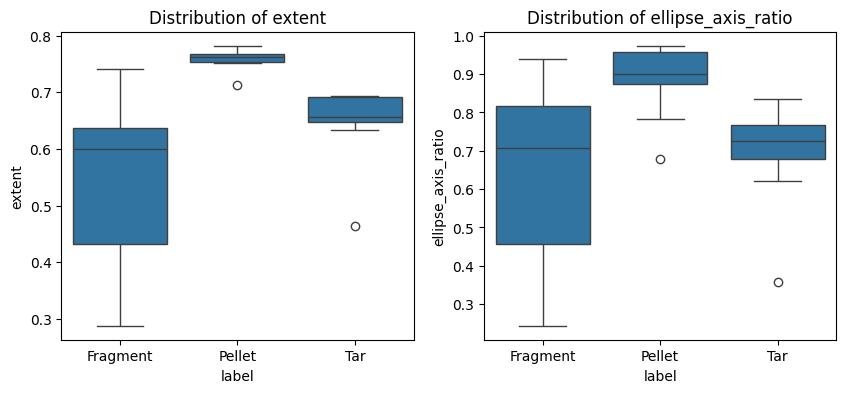

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de características
features = ['area', 'perimeter', 'compactness', 'aspect_ratio', 'extent', 'ellipse_axis_ratio']

# Iterar a través de las características en pares
for i in range(0, len(features), 2):
    plt.figure(figsize=(10, 4))
    
    # Primera característica del par
    plt.subplot(1, 2, 1)
    sns.boxplot(x='label', y=features[i], data=df_clean)
    plt.title(f'Distribution of {features[i]}')
    
    # Segunda característica del par, si existe
    if i + 1 < len(features):
        plt.subplot(1, 2, 2)
        sns.boxplot(x='label', y=features[i + 1], data=df_clean)
        plt.title(f'Distribution of {features[i + 1]}')
    
    plt.show()

In [475]:
# Calculate mean and std per class
grouped = df_clean.groupby('label').agg(['mean', 'std'])
print(grouped)

                 area                perimeter             compactness  \
                 mean          std        mean         std        mean   
label                                                                    
Fragment  4143.363636  3048.763307  318.146409  146.848678   35.178940   
Pellet    4290.650000  1371.448971  247.244190   40.075274   14.563722   
Tar       3009.312500  2756.772931  212.053452   83.075472   16.820184   

                    aspect_ratio              extent            \
                std         mean       std      mean       std   
label                                                            
Fragment  26.454117     1.561770  0.795752  0.547828  0.143998   
Pellet     0.398548     1.024196  0.095197  0.758156  0.018071   
Tar        2.696890     1.042082  0.156148  0.642453  0.075600   

         ellipse_axis_ratio            
                       mean       std  
label                                  
Fragment           0.634322  0.235630 

In [476]:
def classifier(features):
    # Extract feature values
    compactness = features['compactness']
    aspect_ratio = features['aspect_ratio']
    ellipse_axis_ratio = features['ellipse_axis_ratio']
    extent = features['extent']
    
    # Thresholds based on feature distributions (adjusted to avoid overlap)
    compactness_fragment_threshold = 25  # Fragment has a higher compactness (mean ~35.18), threshold set lower
    compactness_pellet_threshold = 15    # Pellet’s compactness (mean ~14.56), slightly above for clean separation
    extent_pellet_threshold = 0.74       # Pellet has a higher extent mean (~0.758), so threshold at 0.74
    extent_fragment_threshold = 0.54     # Fragment’s extent (mean ~0.548) with some margin
    ellipse_axis_ratio_pellet_threshold = 0.8  # Pellet’s ellipse axis ratio mean (~0.887)
    aspect_ratio_fragment_threshold = 1.4  # Fragment’s aspect ratio (mean ~1.56), significant separation

    # Classification logic
    if compactness > compactness_fragment_threshold:
        return 'Fragment'
    elif compactness > compactness_pellet_threshold:
        if extent > extent_pellet_threshold:
            return 'Pellet'
        else:
            return 'Tar'
    else:
        if ellipse_axis_ratio > ellipse_axis_ratio_pellet_threshold:
            return 'Pellet'
        elif aspect_ratio > aspect_ratio_fragment_threshold and extent > extent_fragment_threshold:
            return 'Fragment'
        else:
            return 'Tar'


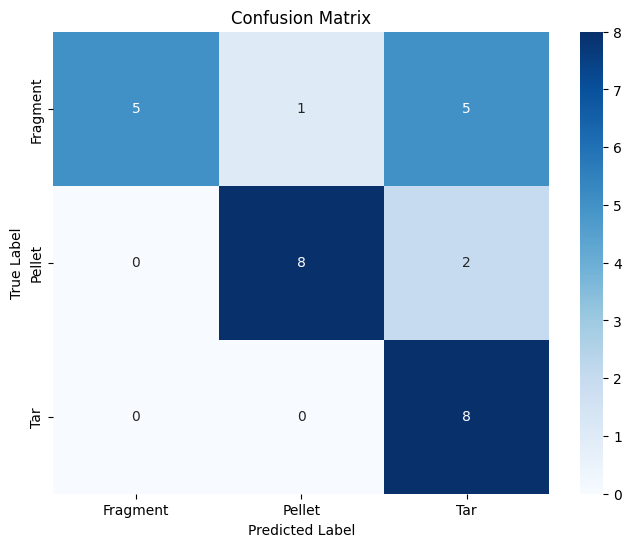

              precision    recall  f1-score   support

    Fragment       1.00      0.45      0.62        11
      Pellet       0.89      0.80      0.84        10
         Tar       0.53      1.00      0.70         8

    accuracy                           0.72        29
   macro avg       0.81      0.75      0.72        29
weighted avg       0.83      0.72      0.72        29



In [477]:
# Apply the classifier to each particle
df.loc[:, 'predicted'] = df.apply(classifier, axis=1)

# Actual labels
y_true = df['label']
# Predicted labels
y_pred = df['predicted']

# Print the labels
# print(y_true.head())
# print(y_pred.head())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['Fragment', 'Pellet', 'Tar'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Fragment', 'Pellet', 'Tar'], yticklabels=['Fragment', 'Pellet', 'Tar'], cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred))

In [478]:
# Function to classify and visualize particles in an image
def classify_and_visualize(original_img, contours, title):
    img_output = original_img.copy()
    for contour in contours:
        # Extract features
        features = extract_features(contour)
    
        # Predict the label using manual classifier
        predicted_label = classifier(features)
    
        # Get bounding box coordinates
        x, y, w, h = cv2.boundingRect(contour)
    
        # Draw rectangle and label
        cv2.rectangle(img_output, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(img_output, predicted_label, (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
    
    # Convert BGR to RGB for plotting
    img_rgb = cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Classification Results - ' + title)
    plt.show()


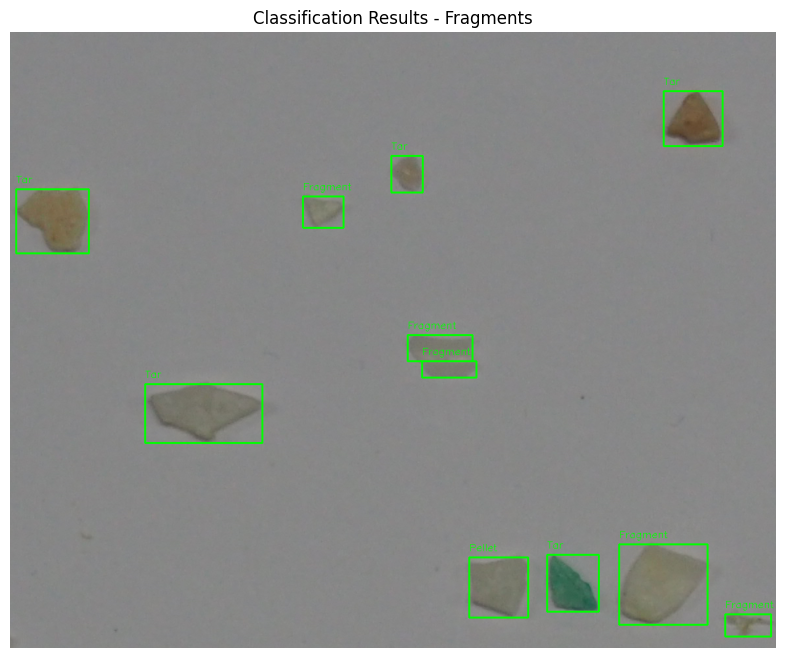

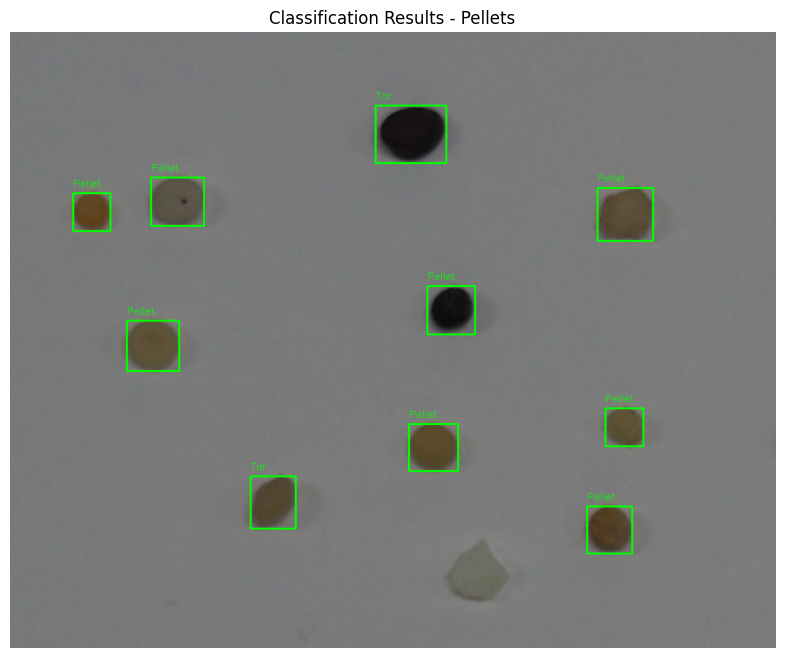

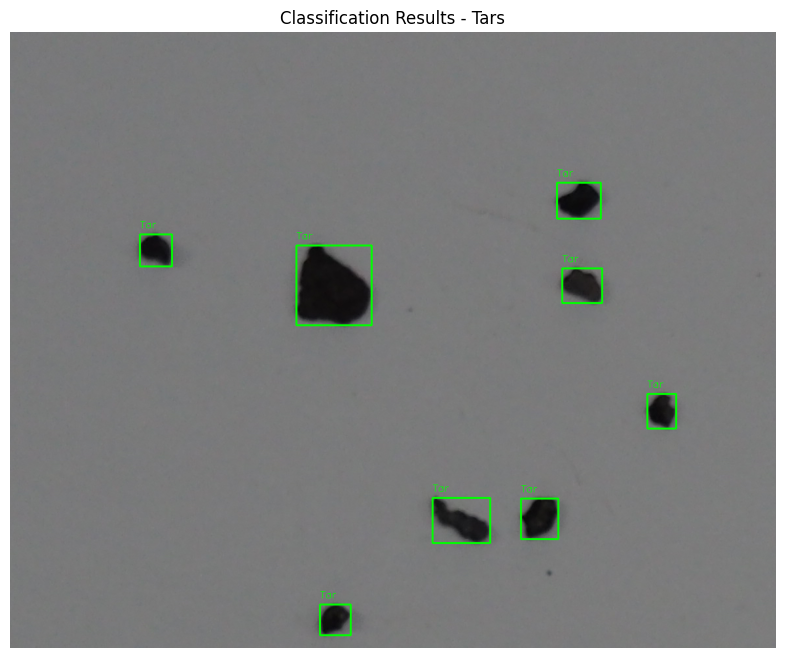

In [479]:
# Visualize results on the fragments image
classify_and_visualize(img_fragments, filtered_fragments, 'Fragments')

# Visualize results on the pellets image
classify_and_visualize(img_pellets, filtered_pellets, 'Pellets')

# Visualize results on the tar image
classify_and_visualize(img_tar, filtered_tar, 'Tars')
